In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


In [122]:
df = pd.read_csv("MallCustomers.csv")

In [123]:

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [124]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [125]:
df["Gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

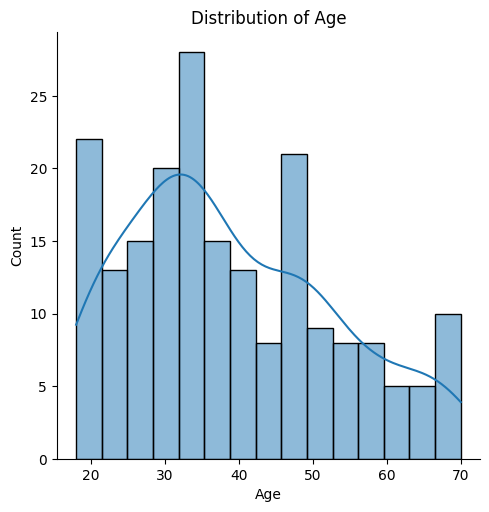

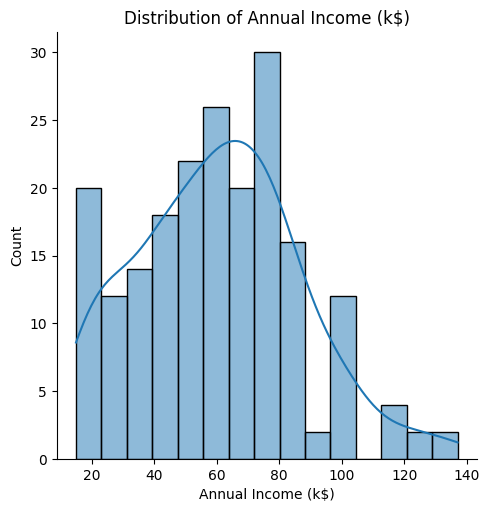

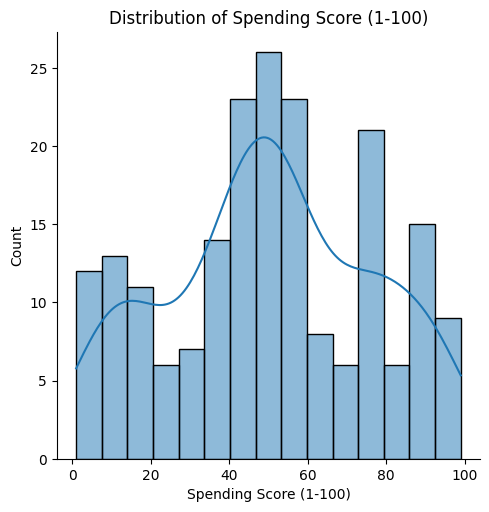

In [126]:
cols = df.columns[2:]
for i in cols:
    sns.displot(data=df,x=i,kind='hist',kde= True,bins=15)
    plt.title(f'Distribution of {i}')
    plt.show()

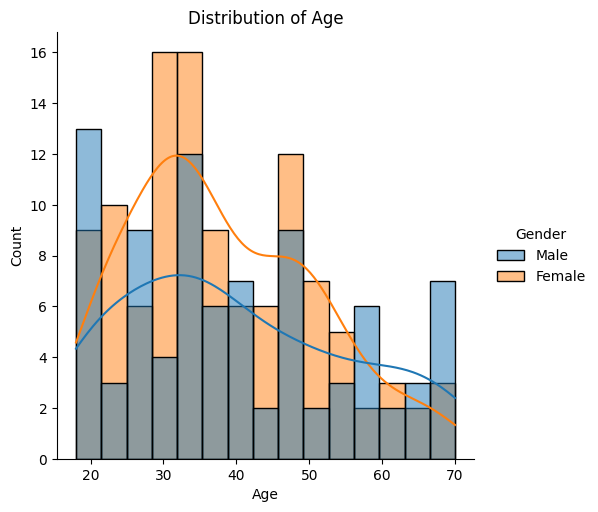

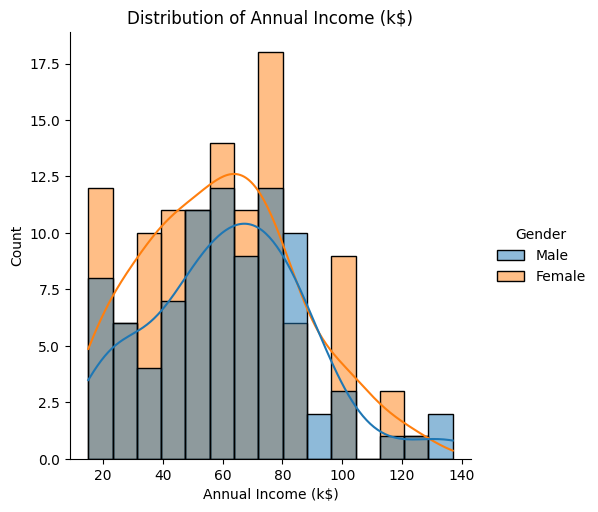

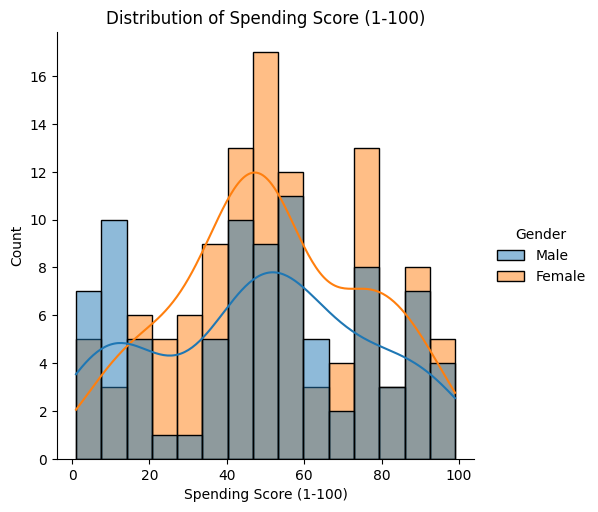

In [127]:
cols = df.columns[2:]
for i in cols:
    sns.displot(data=df,x=i,kind='hist',kde= True,bins=15,hue ='Gender')
    plt.title(f'Distribution of {i}')
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18596\3735993887.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Age", "Annual Income (k$)",'Spending Score (1-100)'])


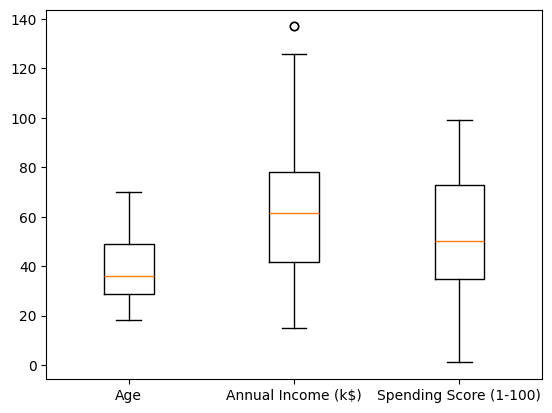

In [128]:
# Data for box plot
data = [df["Age"], df["Annual Income (k$)"],df['Spending Score (1-100)']]

# Create box plot
plt.boxplot(data, labels=["Age", "Annual Income (k$)",'Spending Score (1-100)'])
plt.show()

In [129]:
(max(df["Annual Income (k$)"])-df["Annual Income (k$)"].mean())/df["Annual Income (k$)"].std(ddof=1)

np.float64(2.9103678473873713)

In [130]:
#for category, color in colors.items():
    #subset = df[df['Gender'] == category]

    #print(subset)

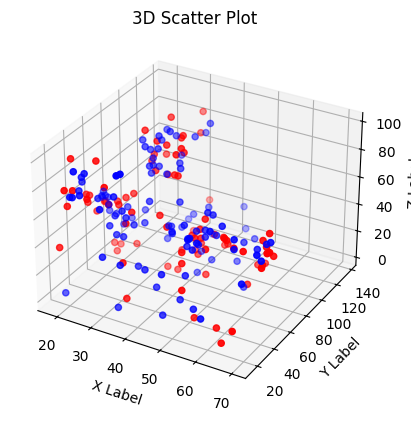

In [131]:

colors = {'Male': 'r', "Female": 'b'}
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for category, color in colors.items():
    subset = df[df['Gender'] == category]
    ax.scatter(subset["Age"], subset["Annual Income (k$)"], subset['Spending Score (1-100)'], c=color, label=category)

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

  

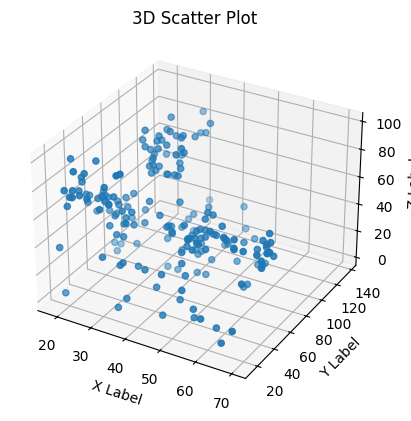

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"], df["Annual Income (k$)"],df['Spending Score (1-100)'])

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

In [133]:
scaled=df[["Age","Annual Income (k$)",'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(scaled)

In [134]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Gender'] = df['Gender']

<Figure size 640x480 with 0 Axes>

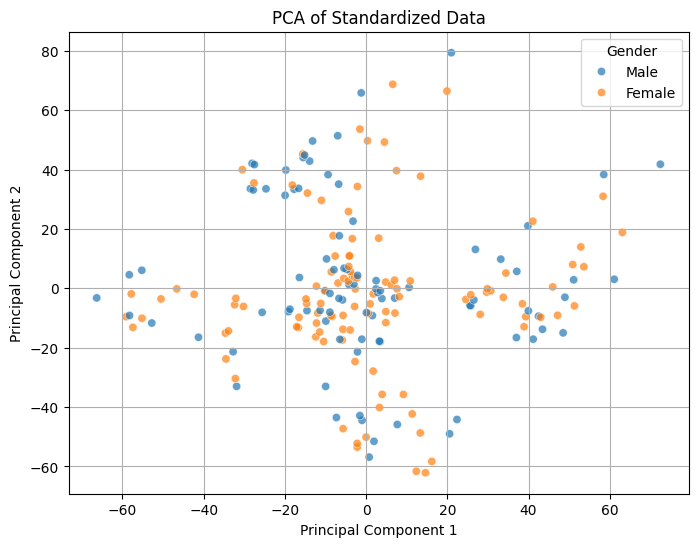

In [135]:
colors = {'Male': 'r', "Female": 'b'}
fig = plt.figure()




plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df,x="PC1",y="PC2", alpha=0.7,hue="Gender")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()

In [136]:
print(sum(pca.explained_variance_ratio_))

0.8922373735506912


In [137]:
pca.components_

array([[-0.1889742 ,  0.58864102,  0.7859965 ],
       [ 0.1309652 ,  0.80837573, -0.57391358]])

<Figure size 640x480 with 0 Axes>

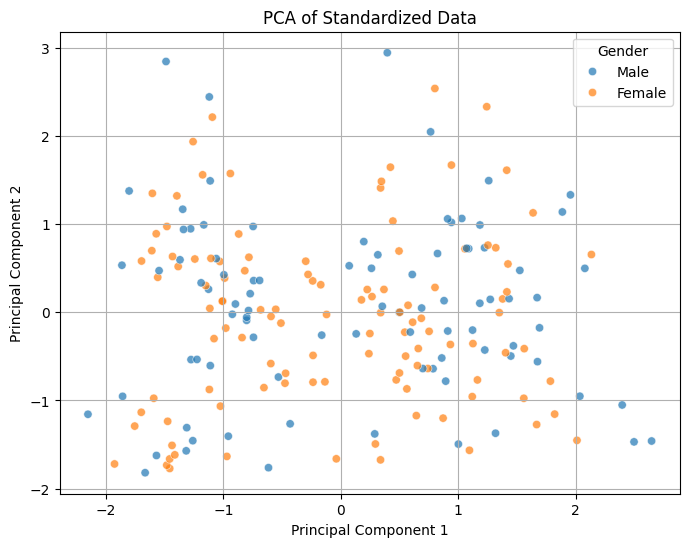

In [138]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Gender'] = df['Gender']

colors = {'Male': 'r', "Female": 'b'}
fig = plt.figure()




plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df,x="PC1",y="PC2", alpha=0.7,hue="Gender")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()

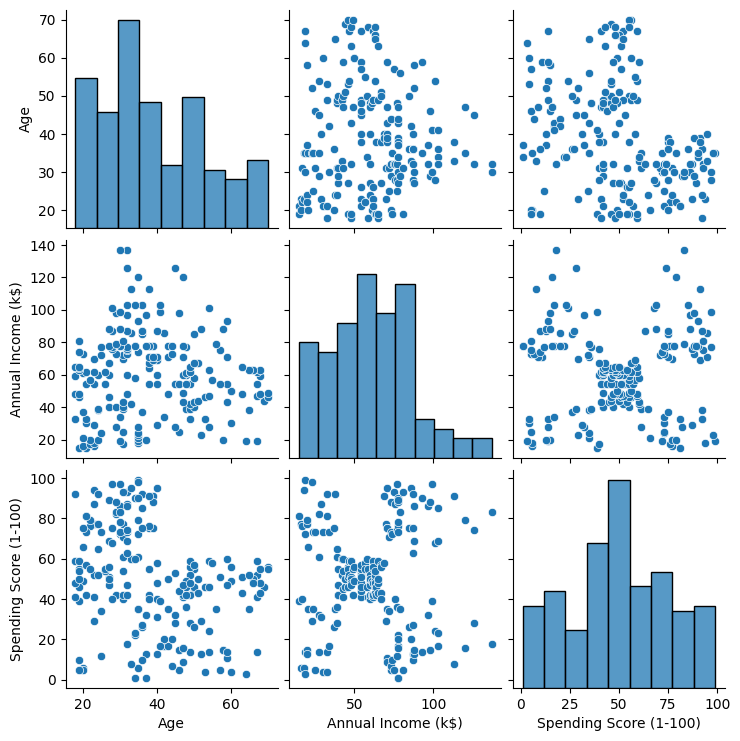

In [139]:
sns.pairplot(df[["Age", "Annual Income (k$)",'Spending Score (1-100)']])

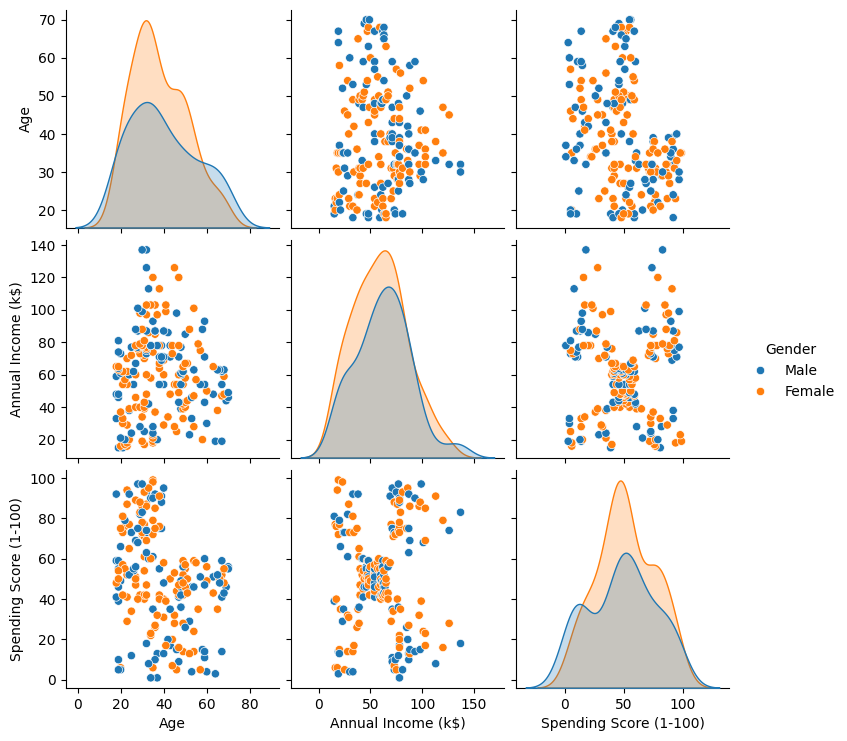

In [140]:
sns.pairplot(df[["Gender","Age", "Annual Income (k$)",'Spending Score (1-100)']],hue="Gender")

In [141]:
df[["Age", "Annual Income (k$)",'Spending Score (1-100)']].corr()
corr=df[["Age", "Annual Income (k$)",'Spending Score (1-100)']].corr()

<Axes: >

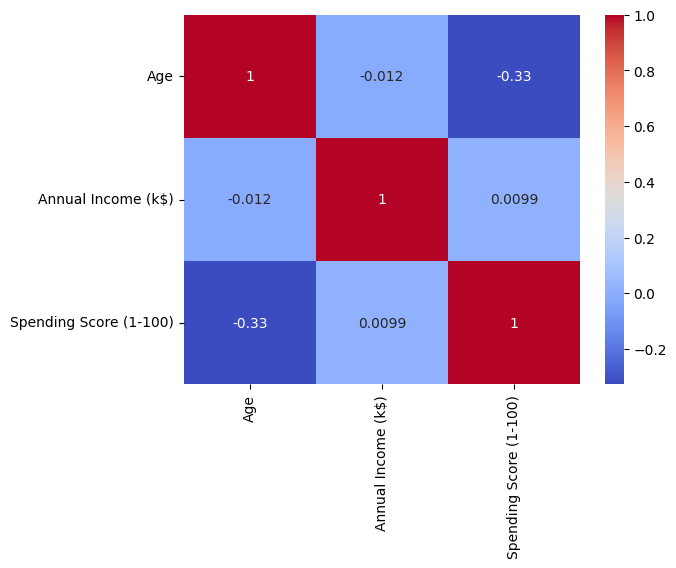

In [142]:
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [143]:
dff=pd.get_dummies(df,drop_first=True,dtype=int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dff[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Male"]])


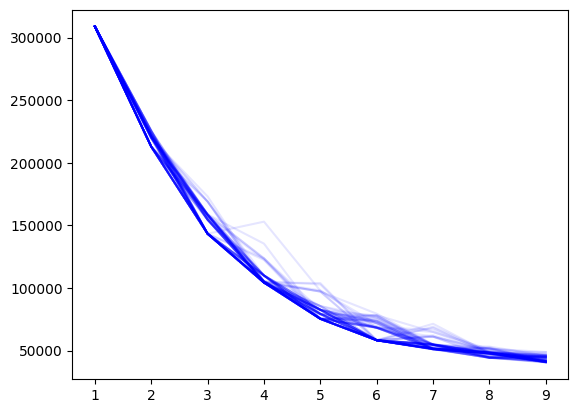

In [144]:

for j in range(1,100):
    inertia=[]
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1,10),inertia,alpha=0.1,color="blue")


plt.show()


In [145]:
cluster = KMeans(n_clusters=6,n_init=1000)
cluster.fit(scaled)

KMeans(n_clusters=6, n_init=1000)

In [163]:

cluster.labels_
df["labels"] = cluster.labels_
df["labels"]

#df.to_csv('clusters.csv', index=False)

<Figure size 640x480 with 0 Axes>

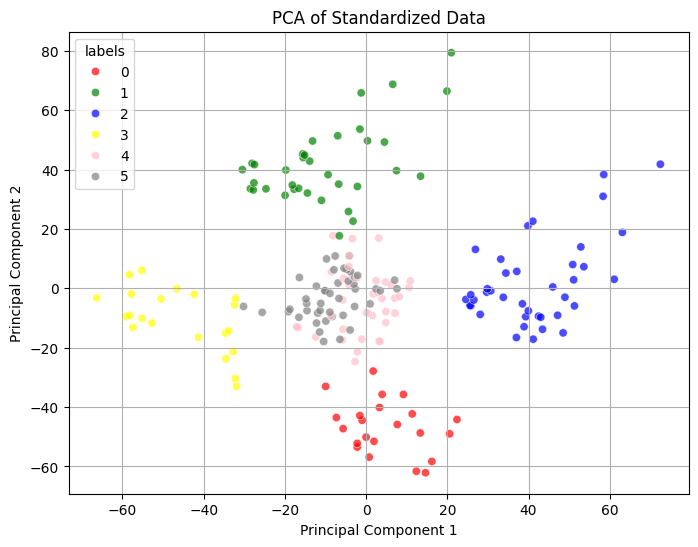

<Figure size 640x480 with 0 Axes>

In [162]:
fig = plt.figure()
pal = {0: 'red', 1: 'green', 2: 'blue', 3: "yellow",4:"pink",5:"grey"}
X_pca = pca.fit_transform(scaled)


# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['labels'] = df['labels']

plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df,x="PC1",y="PC2", alpha=0.7,hue="labels",palette=pal)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()

#plt.savefig('pca_cluster.png')

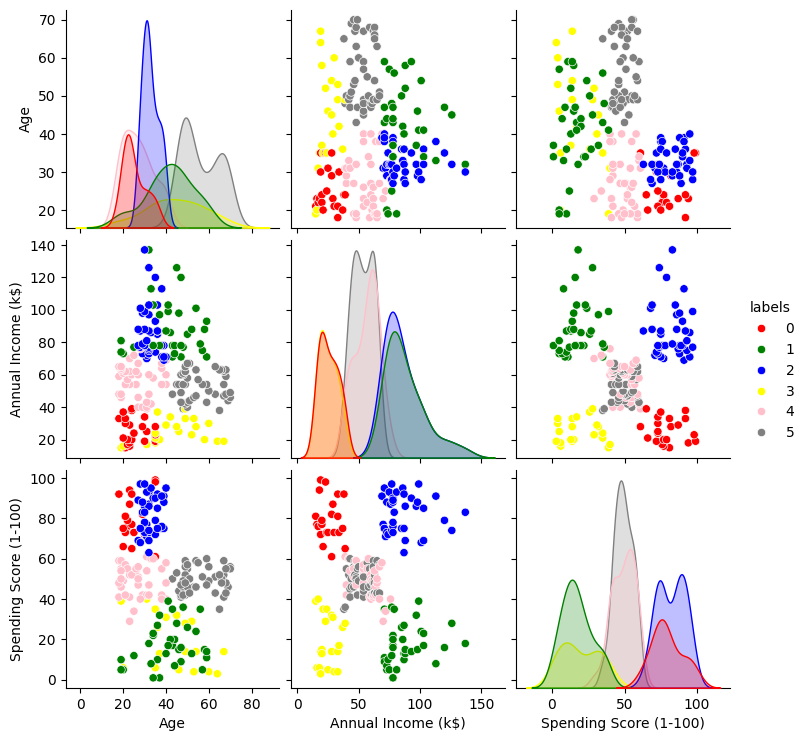

In [149]:
pal2 = {1: 'red', 2: 'green', 3: 'blue', 4: "yellow",5:"pink",6:"grey"}
sns.pairplot(df[["Age", "Annual Income (k$)",'Spending Score (1-100)',"labels"]],hue="labels" , palette=pal)



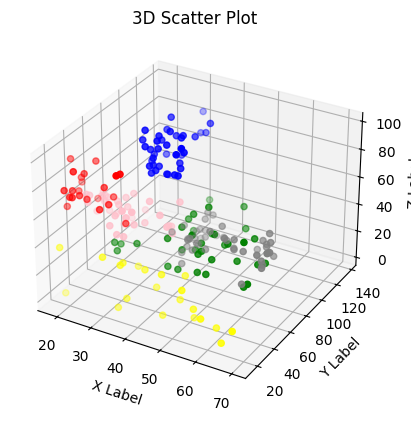

In [150]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for category, color in pal.items():
    subset = df[df['labels'] == category]
    ax.scatter(subset["Age"], subset["Annual Income (k$)"], subset['Spending Score (1-100)'], c=color, label=category)

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

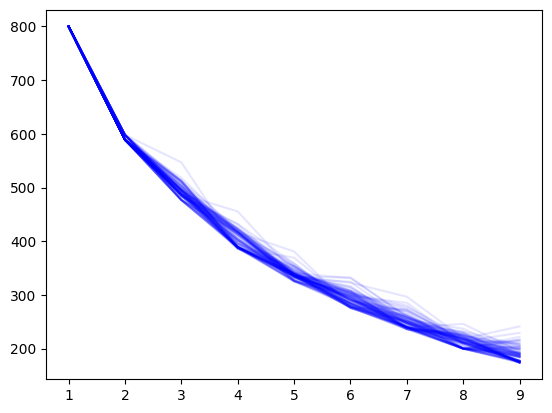

In [151]:
X_scaled = scaler.fit_transform(dff[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Male"]])
for j in range(1,100):
    inertia=[]
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1,10),inertia,alpha=0.1,color="blue")


plt.show()

In [152]:
X_scaled=pd.DataFrame(X_scaled)
X_scaled.columns=["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Male"]

In [153]:
clustern = KMeans(n_clusters=6,n_init=1000)
clustern.fit(X_scaled)

KMeans(n_clusters=6, n_init=1000)

<Figure size 640x480 with 0 Axes>

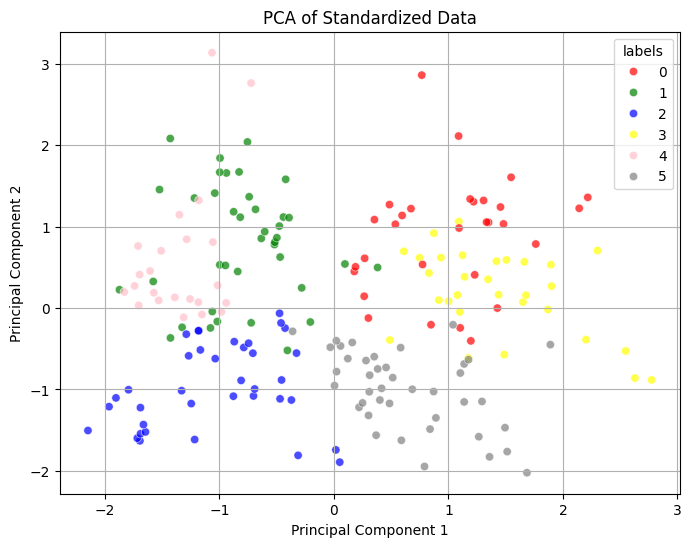

In [154]:
fig = plt.figure()
pal = {0: 'red', 1: 'green', 2: 'blue', 3: "yellow",4:"pink",5:"grey"}
X_pca = pca.fit_transform(X_scaled)


# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['labels'] = clustern.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df,x="PC1",y="PC2", alpha=0.7,hue="labels",palette=pal)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Data')
plt.grid(True)
plt.show()

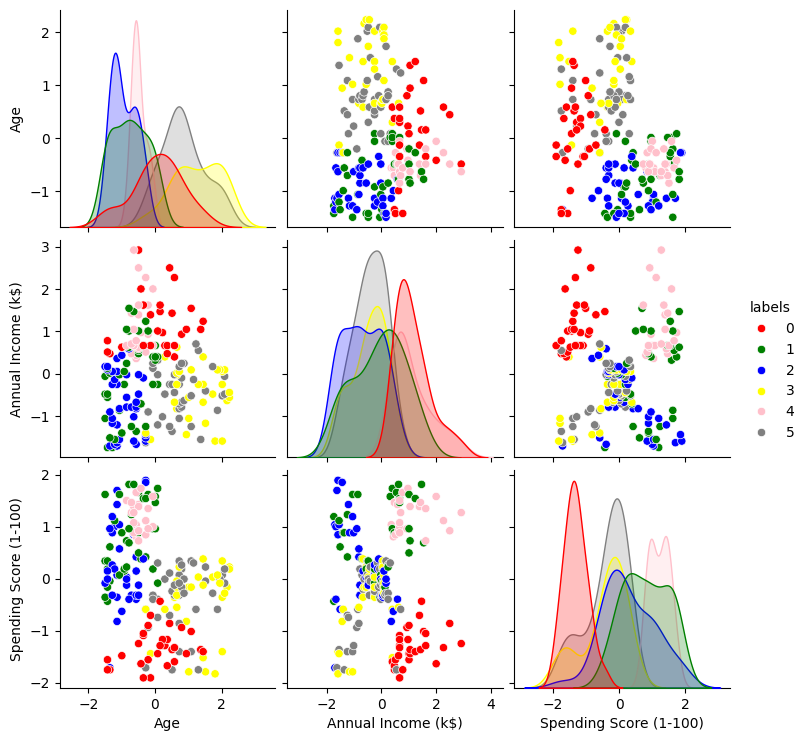

In [155]:
X_scaled["labels"]=pca_df['labels']
sns.pairplot(X_scaled[["Age", "Annual Income (k$)",'Spending Score (1-100)',"labels"]],hue="labels" , palette=pal)


In [156]:

df = pd.read_csv("MallCustomers.csv")
dff=pd.get_dummies(df,drop_first=True,dtype=int)

dff["labels"]=cluster.labels_

profile = pd.DataFrame(np.zeros((6,6)))
profile.index = dff.columns

for i in range(0,6):
    subset = dff[dff['labels'] == i]
    profile[i]=round(subset.mean(axis=0),2)


profile = profile.drop("labels",axis=0)

profile.columns = ("seg_1","seg_2","seg_3","seg_4","seg_5","seg_6")







In [157]:
profile

,seg_1,seg_2,seg_3,seg_4,seg_5,seg_6
CustomerID,23.09,164.43,162.00,21.19,90.05,81.16
Age,25.27,41.69,32.69,44.14,27.00,56.16
Annual Income (k$),25.73,88.23,86.54,25.14,56.66,53.38
Spending Score (1-100),79.36,17.29,82.13,19.52,49.13,49.09
Gender_Male,0.41,0.57,0.46,0.38,0.34,0.44
